In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tf_agents as tfa

In [2]:
import sys
sys.path.append('..')

In [3]:
from stonks.DataCatcher import DB

In [4]:
db = DB()

In [5]:
test_time = 3600 * 3
start_time = 1581434096
indent = 3600
data = db.fetch_pandas(start_time - indent, start_time + test_time, pair_names={'btcusdt'})

In [6]:
backup = data.copy()
data.head()

,id,time,currency_pair,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,...,depth_ask_quantity_11,depth_ask_quantity_12,depth_ask_quantity_13,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20
0,18143,1.581430e+09,btcusdt,751,9892.75,9898.27,9899.0,9890.51,37.334362,3.694741e+05,...,0.300202,0.200000,0.211924,3.250000,0.076492,0.029076,0.200000,0.405080,1.624372,0.300000
1,18154,1.581430e+09,btcusdt,751,9892.75,9898.27,9899.0,9890.51,37.334362,3.694741e+05,...,0.300202,1.636193,0.200000,0.211924,3.250000,0.076492,0.029076,0.200000,0.405080,1.624372
2,18165,1.581430e+09,btcusdt,751,9892.75,9898.27,9899.0,9890.51,37.334362,3.694741e+05,...,0.238931,0.300202,1.636193,0.200000,0.211924,3.250000,0.076492,0.029076,0.200000,0.405080
3,18176,1.581431e+09,btcusdt,658,9896.91,9892.23,9899.0,9890.00,113.940025,1.127307e+06,...,0.072047,0.240000,0.238931,1.636193,0.200000,3.250000,0.200000,0.076492,0.029076,0.200000
4,18187,1.581431e+09,btcusdt,658,9896.91,9892.23,9899.0,9890.00,113.940025,1.127307e+06,...,1.624652,0.240000,0.238931,0.202197,0.338345,1.636193,0.200000,3.250000,0.200000,0.076492


In [7]:
import stonks.auxiliary.data_preprocessing as dp

In [8]:
data = dp.basic_clean(data)
data.head()

,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,kline_taker_base_volume,kline_taker_quote_volume,kline_time_since_update,...,depth_ask_quantity_11,depth_ask_quantity_12,depth_ask_quantity_13,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20
normal_time,,,,,,,,,,,,,,,,,,,,,
2020-02-11 17:14:56.493912,751,9892.75,9898.27,9899.0,9890.51,37.334362,3.694741e+05,20.694046,204800.953949,56492.987549,...,0.300202,0.200000,0.211924,3.250000,0.076492,0.029076,0.200000,0.405080,1.624372,0.300000
2020-02-11 17:14:57.716687,751,9892.75,9898.27,9899.0,9890.51,37.334362,3.694741e+05,20.694046,204800.953949,57714.942871,...,0.300202,1.636193,0.200000,0.211924,3.250000,0.076492,0.029076,0.200000,0.405080,1.624372
2020-02-11 17:14:58.946222,751,9892.75,9898.27,9899.0,9890.51,37.334362,3.694741e+05,20.694046,204800.953949,58945.212891,...,0.238931,0.300202,1.636193,0.200000,0.211924,3.250000,0.076492,0.029076,0.200000,0.405080
2020-02-11 17:15:00.174831,658,9896.91,9892.23,9899.0,9890.00,113.940025,1.127307e+06,59.674289,590407.202867,173.825195,...,0.072047,0.240000,0.238931,1.636193,0.200000,3.250000,0.200000,0.076492,0.029076,0.200000
2020-02-11 17:15:01.394274,658,9896.91,9892.23,9899.0,9890.00,113.940025,1.127307e+06,59.674289,590407.202867,1386.189209,...,1.624652,0.240000,0.238931,0.202197,0.338345,1.636193,0.200000,3.250000,0.200000,0.076492


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.preprocessing import StandardScaler

copy = data.copy()
some = dp.make_x(copy)

In [11]:
some.head()

,kline_trade_number,kline_base_volume,kline_quote_volume,kline_taker_base_volume,kline_taker_quote_volume,kline_time_since_update,volume_adi,volume_obv,volume_cmf,volume_fi,...,imbalance_2,imbalance_3,imbalance_4,imbalance_5,spread,rolling_5s,rolling_15s,rolling_30s,rolling_1min,rolling_5min
normal_time,,,,,,,,,,,,,,,,,,,,,
2020-02-11 17:15:00.174831,657.14,112.359097,1.111663e+06,58.696918,580736.734845,31175.225361,-56.599606,112.359097,-0.503739,0.0,...,0.698215,0.723431,0.609812,0.667221,1.62,1.000000,1.000000,1.000000,1.000000,1.000000
2020-02-11 17:15:01.394274,657.14,112.359097,1.111663e+06,58.696918,580736.734845,31175.225361,-56.599606,112.359097,-0.503739,0.0,...,-0.182113,0.895913,0.319028,0.330439,1.41,0.999994,0.999994,0.999994,0.999994,0.999994
2020-02-11 17:15:03.317110,657.14,112.359097,1.111663e+06,58.696918,580736.734845,31175.225361,-56.599606,112.359097,-0.503739,0.0,...,0.786535,0.342554,0.347343,0.094887,1.18,0.999999,0.999999,0.999999,0.999999,0.999999
2020-02-11 17:15:05.348821,657.14,112.359097,1.111663e+06,58.696918,580736.734845,31175.225361,-56.599606,112.359097,-0.503739,0.0,...,0.707409,0.566383,0.832700,0.789351,0.29,0.999941,0.999931,0.999931,0.999931,0.999931
2020-02-11 17:15:06.640317,657.14,112.359097,1.111663e+06,58.696918,580736.734845,31175.225361,-56.599606,112.359097,-0.503739,0.0,...,-0.998998,-0.993568,-0.971755,-0.971032,0.01,0.999978,0.999955,0.999955,0.999955,0.999955


In [12]:
final = StandardScaler().fit_transform(some)
print(final.dtype)
final.shape

float64


(11748, 109)

In [27]:
some.head()

,kline_trade_number,kline_base_volume,kline_quote_volume,kline_taker_base_volume,kline_taker_quote_volume,kline_time_since_update,volume_adi,volume_obv,volume_cmf,volume_fi,...,imbalance_2,imbalance_3,imbalance_4,imbalance_5,spread,rolling_5s,rolling_15s,rolling_30s,rolling_1min,rolling_5min
normal_time,,,,,,,,,,,,,,,,,,,,,
2020-02-11 17:15:00.174831,657.14,112.359097,1.111663e+06,58.696918,580736.734845,31175.225361,-56.599606,112.359097,-0.503739,0.0,...,0.698215,0.723431,0.609812,0.667221,1.62,1.000000,1.000000,1.000000,1.000000,1.000000
2020-02-11 17:15:01.394274,657.14,112.359097,1.111663e+06,58.696918,580736.734845,31175.225361,-56.599606,112.359097,-0.503739,0.0,...,-0.182113,0.895913,0.319028,0.330439,1.41,0.999994,0.999994,0.999994,0.999994,0.999994
2020-02-11 17:15:03.317110,657.14,112.359097,1.111663e+06,58.696918,580736.734845,31175.225361,-56.599606,112.359097,-0.503739,0.0,...,0.786535,0.342554,0.347343,0.094887,1.18,0.999999,0.999999,0.999999,0.999999,0.999999
2020-02-11 17:15:05.348821,657.14,112.359097,1.111663e+06,58.696918,580736.734845,31175.225361,-56.599606,112.359097,-0.503739,0.0,...,0.707409,0.566383,0.832700,0.789351,0.29,0.999941,0.999931,0.999931,0.999931,0.999931
2020-02-11 17:15:06.640317,657.14,112.359097,1.111663e+06,58.696918,580736.734845,31175.225361,-56.599606,112.359097,-0.503739,0.0,...,-0.998998,-0.993568,-0.971755,-0.971032,0.01,0.999978,0.999955,0.999955,0.999955,0.999955


In [8]:
bla = backup['time']

In [19]:
import datetime
bla.index = bla.apply(datetime.datetime.fromtimestamp)
bla

time
2020-02-11 17:14:56.493912    1.581430e+09
2020-02-11 17:14:57.716687    1.581430e+09
2020-02-11 17:14:58.946222    1.581430e+09
2020-02-11 17:15:00.174831    1.581431e+09
2020-02-11 17:15:01.394274    1.581431e+09
                                  ...     
2020-02-12 06:14:50.135892    1.581477e+09
2020-02-12 06:14:51.330169    1.581477e+09
2020-02-12 06:14:52.502125    1.581477e+09
2020-02-12 06:14:53.654346    1.581477e+09
2020-02-12 06:14:54.846639    1.581477e+09
Name: time, Length: 38525, dtype: float64

In [17]:
times = pd.Series(range(start_time, start_time + test_time))

0        1581434096
1        1581434097
2        1581434098
3        1581434099
4        1581434100
            ...    
43195    1581477291
43196    1581477292
43197    1581477293
43198    1581477294
43199    1581477295
Length: 43200, dtype: int64

In [32]:
bla = bla.reset_index(drop=True)

In [40]:
blata = pd.DataFrame(bla)
blata['index'] = blata.index
blata.head()

,time,index
0,1.581430e+09,0
1,1.581430e+09,1
2,1.581430e+09,2
3,1.581431e+09,3
4,1.581431e+09,4


In [42]:
df = pd.DataFrame(times, columns=['time']).merge(pd.DataFrame(blata), how='outer', sort=True)

/home/data_sapiens/.local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:1108: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [43]:
timeta = pd.DataFrame(times, columns=['time'])

In [45]:
df['index'].ffill(inplace=True)

In [48]:
timeta.join(df.set_index('time'), on='time')

/home/data_sapiens/.local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:1108: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,time,index
0,1581434096,3005.0
1,1581434097,3006.0
2,1581434098,3007.0
3,1581434099,3007.0
4,1581434100,3008.0
...,...,...
43195,1581477291,38520.0
43196,1581477292,38521.0
43197,1581477293,38522.0
43198,1581477294,38523.0


In [57]:
btcdata = db.fetch_pandas(start_time - indent, start_time + test_time, pair_names={'btcusdt'})
ethdata = db.fetch_pandas(start_time - indent, start_time + test_time, pair_names={'ethusdt'})

In [66]:
btctime = btcdata['time']
ethtime = ethdata['time']

In [62]:
import stonks.auxiliary.data_preprocessing as dp
import warnings
warnings.filterwarnings('ignore')

In [75]:
data = ethdata.copy()
data = dp.basic_clean(data)
copy = data.copy()
some = dp.make_x(copy)

In [69]:
btctime = btctime[some.index]

In [68]:
import datetime
btctime.index = btctime.apply(datetime.datetime.fromtimestamp)
ethtime.index = ethtime.apply(datetime.datetime.fromtimestamp)

In [76]:
ethtime = ethtime[some.index]

In [90]:
time = btctime.reset_index(drop=True)

In [91]:
current = pd.Series(range(start_time, start_time + test_time))

In [99]:
timeta = pd.DataFrame(time, columns=['time'])
timeta['index'] = timeta.index
curta = pd.DataFrame(current, columns=['time'])
merged = curta.merge(timeta, how='outer', sort=True)
merged.ffill(inplace=True)
final = curta.join(merged.set_index('time'), on='time')

In [106]:
list(zip(time[3000:3010].index, time[3000:3010]))

[(3000, 1581434093.2338245),
 (3001, 1581434094.4145727),
 (3002, 1581434095.5433743),
 (3003, 1581434096.7395248),
 (3004, 1581434097.9707556),
 (3005, 1581434099.2192307),
 (3006, 1581434100.4551678),
 (3007, 1581434101.7774856),
 (3008, 1581434104.2590535),
 (3009, 1581434105.5977175)]

In [120]:
final = final.set_index('time')

In [124]:
final['index'] = final['index'].apply(int)

In [119]:
datetime.datetime.fromtimestamp(1581454096)

datetime.datetime(2020, 2, 11, 23, 48, 16)

In [129]:
some.shape

(38521, 109)

In [137]:
i = 12
print(final.iloc[i], datetime.datetime.fromtimestamp(final.index[i]))
some.iloc[final.iloc[i]].index

index    3011
Name: 1581434108, dtype: int64 2020-02-11 18:15:08


DatetimeIndex(['2020-02-11 18:15:09.283350'], dtype='datetime64[ns]', name='normal_time', freq=None)

In [15]:
toy = {'btcusdt': final[0], 'ethusdt': final[1], 'bchusdt': final[2]}
balance = {'usdt': 200, 'btc': 0}

In [24]:
npbalance = np.array(list(balance.values()))
np.hstack(list(toy.values()) + [npbalance]).shape

(329,)

In [276]:
from importlib import reload

import stonks.paper_testing
reload(stonks.paper_testing.LearningEnvironment)
reload(stonks.paper_testing)

<module 'stonks.paper_testing' from '../stonks/paper_testing/__init__.py'>

In [2]:
import numpy as np
import pandas as pd

import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('ignore')

In [277]:
from stonks.paper_testing.LearningEnvironment import LearningEnvironment
from stonks.paper_testing import Emulator

195.14.105.89

In [278]:
balance = {'usdt': 100, 'btc': 0, 'eth': 0, 'bch': 0, 'bnb': 0, 'ltc': 0}

emu = Emulator(string_start='../')
env = LearningEnvironment(emu, balance, string_start='../', test_time=3600, orderbook_depth=5)

In [231]:
import abc
import tensorflow as tf
import numpy as np

from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts

In [262]:
%time utils.validate_py_environment(env, episodes=1)

CPU times: user 5.42 s, sys: 3.53 ms, total: 5.42 s
Wall time: 5.42 s


In [244]:
import random

def validate_me():
    env.reset()
    while not env._episode_ended:
        env.step(random.randint(0, 22))

In [249]:
%time validate_me()

CPU times: user 130 ms, sys: 3.92 ms, total: 134 ms
Wall time: 131 ms


In [252]:
a = {'a': 1, 'b': 2}

In [254]:
b = a
c = a
b['a'] = 3

In [267]:
a = env.step(2)
a

TimeStep(step_type=array(1, dtype=int32), reward=array(88.01928, dtype=float32), discount=array(1., dtype=float32), observation=array([-0.49953203, -0.53997724, -0.54172936, ...,  0.02666904,
        0.001     ,  0.44984808]))

In [279]:
rewards = []
env.reset()

while not env._episode_ended:
    step = env.step(random.randint(0, 22))
    rewards.append(step.reward.item())

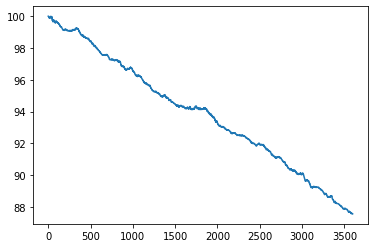

In [280]:
import matplotlib.pyplot as plt
plt.plot(range(len(rewards)), rewards)

In [283]:
import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

In [284]:
balance = {'usdt': 100, 'btc': 0, 'eth': 0, 'bch': 0, 'bnb': 0, 'ltc': 0}

emu = Emulator(string_start='../')

train_py_env = LearningEnvironment(emu, balance, string_start='../', test_time=3600, orderbook_depth=5)
eval_py_env = LearningEnvironment(emu, balance, string_start='../', test_time=3600, orderbook_depth=5)

In [285]:
train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

In [287]:
fc_layer_params = (128, 32)

q_net = q_network.QNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=fc_layer_params)

In [289]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=1e-3)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()

W0501 20:22:21.765276 139730524723008 base_layer.py:1790] Layer QNetwork is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

W0501 20:22:21.784115 139730524723008 base_layer.py:1790] Layer TargetQNetwork is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defa

In [290]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

In [291]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

In [299]:
def compute_avg_return(environment, policy, num_episodes=5):

    total_return = 0.0
    for _ in range(num_episodes):

        time_step = environment.reset()
        episode_return = 0.0

        while not time_step.is_last():
            action_step = policy.action(time_step)
            time_step = environment.step(action_step.action)
            episode_return += time_step.reward
        total_return += episode_return

    avg_return = total_return / num_episodes
    return avg_return.numpy()[0]

In [300]:
compute_avg_return(eval_env, random_policy, 2)

337646.12

In [303]:
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=1000)

In [304]:
def collect_step(environment, policy, buffer):
    time_step = environment.current_time_step()
    action_step = policy.action(time_step)
    next_time_step = environment.step(action_step.action)
    traj = trajectory.from_transition(time_step, action_step, next_time_step)

  # Add trajectory to the replay buffer
    buffer.add_batch(traj)

def collect_data(env, policy, buffer, steps):
    for _ in range(steps):
        collect_step(env, policy, buffer)

collect_data(train_env, random_policy, replay_buffer, steps=100)

In [307]:

# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, 
    sample_batch_size=10, 
    num_steps=2).prefetch(3)


dataset

<PrefetchDataset shapes: (Trajectory(step_type=(10, 2), observation=(10, 2, 1205), action=(10, 2), policy_info=(), next_step_type=(10, 2), reward=(10, 2), discount=(10, 2)), BufferInfo(ids=(10, 2), probabilities=(10,))), types: (Trajectory(step_type=tf.int32, observation=tf.float64, action=tf.int32, policy_info=(), next_step_type=tf.int32, reward=tf.float32, discount=tf.float32), BufferInfo(ids=tf.int64, probabilities=tf.float32))>

In [312]:
iterator = iter(dataset)

In [316]:
# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, 2)
returns = [avg_return]

for _ in range(10):

  # Collect a few steps using collect_policy and save to the replay buffer.
    for _ in range(1):
        collect_step(train_env, agent.collect_policy, replay_buffer)

  # Sample a batch of data from the buffer and update the agent's network.
    experience, unused_info = next(iterator)
    train_loss = agent.train(experience).loss

    step = agent.train_step_counter.numpy()

    print('step = {0}: loss = {1}'.format(step, train_loss))

    avg_return = compute_avg_return(eval_env, agent.policy, 2)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

step = 1: loss = 10028.9091796875
step = 1: Average Return = 359804.71875
step = 2: loss = 10032.7529296875
step = 2: Average Return = 360415.71875
step = 3: loss = 10062.697265625
step = 3: Average Return = 360415.71875
step = 4: loss = 10009.5234375
step = 4: Average Return = 360662.03125
step = 5: loss = 9999.8154296875
step = 5: Average Return = 360662.03125
step = 6: loss = 10102.326171875
step = 6: Average Return = 361374.84375
step = 7: loss = 10120.482421875
step = 7: Average Return = 361618.5625
step = 8: loss = 10166.802734375
step = 8: Average Return = 361636.3125
step = 9: loss = 10187.3349609375
step = 9: Average Return = 361636.3125
step = 10: loss = 10180.458984375
step = 10: Average Return = 361570.9375


In [8]:
from tqdm.notebook import tqdm
import time
from IPython.display import clear_output

for i in tqdm.notebook.tqdm(range(100)):
    if i % 10 == 0:
        print(i)
    time.sleep(0.1)

ModuleNotFoundError: No module named 'tqdm.notebook'